# Revisiting insurance.csv Data Set

After learning about various regularization techniques and mini-batch gradient descent, I want to see if I can reimplement linear regression on the insurance.csv data set and see if I can improve my model.

In [118]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

'''
x_data: 2D array of inputs (each row representing a single data point)
    if 1D array of inputs is passed, the function will automatically convert it into 2D where each row is its own 1D array of size 1
y_data: 1D array of outputs
alpha: used for learning rate of regression model
epochs: number of simulation runs
params: list of 1+n scalars used to get prediction value (y-hat) where n is the # of columns
regularization: setting for the type of regularization
    * L1 / Lasso
    * L2 / Ridge
    * Elastic Net
lambda_const: constant value to use for regularization penalty

returns the refined parameters
'''
def linear_regression(x_data, y_data, alpha = 0.02, epochs = 100, params = [], regularization = '', lambda_const = 1):

    # prepping data here
    # converts x_data from 1D to 2D if necessary
    if not isinstance(x_data[0], list):
        x_data = [[row] for row in x_data]

    # if no parameters were passed, set them equal to 0
    if len(params) == 0:
        params = [0 for i in range(len(x_data[0]))]
        params.append(0) # adding extra 0 for the bias

    n = len(x_data)

    # returns y-hat
    def prediction(input_list):
        result = params[0] # the bias

        for i in range(len(input_list)):
            result += params[i + 1] * input_list[i] # coefficient * input
        
        return result # y-hat
    
    # returns sum of residuals
    def sum_residuals(multiplier_index = -1):
        
        multipliers = [1 for i in range(len(x_data))] if multiplier_index == -1 else [row[multiplier_index] for row in x_data]

        sum_error = 0

        for i in range(len(x_data)):
            sum_error += (y_data[i] - prediction(x_data[i]))*multipliers[i]

        return sum_error



    # running simulations and updating parameters here
    for epoch in range(epochs):
        params[0] += 2 * alpha * sum_residuals() / n # updating bias term

        # updating the coefficient terms
        for i in range(1, len(params)):
            reg_penalty = 0

            if regularization.upper() == 'L1' or regularization.upper() == 'LASSO': # lasso regression
                reg_penalty = alpha * lambda_const * np.sign(params[i])
            elif regularization.upper() == 'L2' or regularization.upper() == 'RIDGE': # ridge
                reg_penalty = 2 * alpha * lambda_const * params[i]
            elif regularization.upper() == 'ELASTIC NET':
                reg_penalty = (2 * alpha * lambda_const * params[i]) + (alpha * lambda_const * np.sign(params[i]))
            
            params[i] += (2 * alpha * sum_residuals(i - 1) / n) - reg_penalty

    return params




'''
x_data: 2D array of inputs (each row representing a single data point)
    if 1D array of inputs is passed, the function will automatically convert it into 2D where each row is its own 1D array of size 1
y_data: 1D array of outputs
alpha: used for learning rate of regression model
epochs: number of simulation runs
params: list of 1+n scalars used to get prediction value (y-hat) where n is the # of columns
regularization: setting for the type of regularization
    * L1 / Lasso
    * L2 / Ridge
    * Elastic Net
lambda_const: constant value to use for regularization penalty

returns the refined parameters
'''
def logistic_regression(x_data, y_data, alpha = 0.02, epochs = 100, params = [], regularization = '', lambda_const = 1):

    # prepping data here
    # converts x_data from 1D to 2D if necessary
    if not isinstance(x_data[0], list):
        x_data = [[row] for row in x_data]

    # if no parameters were passed, set them equal to 0
    if len(params) == 0:
        params = [0 for i in range(len(x_data[0]))]
        params.append(0) # adding extra 0 for the bias

    n = len(x_data)

    # return y-hat
    def prediction(input_list):
        polynomial = params[0]

        for i in range(len(input_list)):
            polynomial += params[i + 1] * input_list[i] # coefficient * input

        return 1 / (1 + (math.e**(-1 * polynomial))) # logistic function
    
    # return sum of residuals
    def sum_residuals(multiplier_index = -1):
        multipliers = [1 for i in range(len(x_data))] if multiplier_index == -1 else [row[multiplier_index] for row in x_data]

        sum_error = 0

        for i in range(len(x_data)):
            sum_error += (y_data[i] - prediction(x_data[i]))*multipliers[i]

        return sum_error
    
    # running simulations and updating parameters here
    for epoch in range(epochs):
        params[0] += alpha * sum_residuals() / n # updating bias term

        # updating the coefficient terms
        for i in range(1, len(params)):
            reg_penalty = 0

            if regularization.upper() == 'L1' or regularization.upper() == 'LASSO': # lasso regression
                reg_penalty = alpha * lambda_const * np.sign(params[i])
            elif regularization.upper() == 'L2' or regularization.upper() == 'RIDGE': # ridge regression
                reg_penalty = 2 * alpha * lambda_const * params[i]
            elif regularization.upper() == 'ELASTIC NET':
                reg_penalty = (2 * alpha * lambda_const * params[i]) + (alpha * lambda_const * np.sign(params[i]))
            
            params[i] += (alpha * sum_residuals(i - 1) / n) - reg_penalty

    return params



'''
x_data: 2D array of inputs (each row representing a single data point)
    if 1D array of inputs is passed, the function will automatically convert it into 2D where each row is its own 1D array of size 1
y_data: 1D array of outputs
sample_rate: float in the range (0, 1) that determines the proportion of data to be sampled
alpha: used for learning rate of regression model
epochs: number of simulation runs
params: list of 1+n scalars used to get prediction value (y-hat) where n is the # of columns
setting: determines if mini-batch will used linear or logistic regression model
regularization: setting for the type of regularization
    * L1 / Lasso
    * L2 / Ridge
    * Elastic Net
lambda_const: constant value to use for regularization penalty

returns the refined parameters
'''
def mini_batch_gradient_descent(x_data, y_data, sample_rate, alpha = 0.02, epochs = 100, params = [], setting = 'linear', regularization = '', lambda_const = 1):
    # first combine x & y dataset
    combined = [(x_data[i], y_data[i]) for i in range(len(x_data))]
    n = math.floor(len(x_data) * sample_rate) # the number of samples

    for i in range(epochs):
        curr_sample = random.sample(combined, n) # take n random sample of the combined dataset
        curr_x_sample = [curr_sample[i][0] for i in range(n)]
        curr_y_sample = [curr_sample[i][1] for i in range(n)]

        # learn from current sample
        if setting == 'linear':
            params = linear_regression(curr_x_sample, curr_y_sample, alpha, epochs=1, params=params, regularization=regularization, lambda_const=lambda_const)
        elif setting == 'logistic':
            params = logistic_regression(curr_x_sample, curr_y_sample, alpha, epochs=1, params=params, regularization=regularization, lambda_const=lambda_const)

    return params

In [119]:
# loading insurance.csv
import pandas as pd

df = pd.read_csv('insurance.csv')

# printing first 5 rows of dataframe
print(df.head())

print(f'num entries: {len(df)}')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
num entries: 1338


# Data Prep

In [120]:
# I'm interested in using one-hot encoding on the regions column
# get a list of unique regions & counts
unique_regions = {} # dictionary of regions & num counts

for i in range(len(df)):
    # register new region
    if df['region'][i] not in unique_regions:
        unique_regions[df['region'][i]] = 0

    # increment count
    unique_regions[df['region'][i]] += 1

print(unique_regions)
"""
northeast: 324
southeast: 364
southwest: 325
northwest: 325
"""

"""
ENCODING: 
    [region] ==> [northeast, southeast, southwest, northwest]
    [sex] ==> [1 for male: 0 for female]
    [smoker] ==> [1 for yes: 0 for no]
"""

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}


'\nENCODING: \n    [region] ==> [northeast, southeast, southwest, northwest]\n    [sex] ==> [1 for male: 0 for female]\n    [smoker] ==> [1 for yes: 0 for no]\n'

In [121]:
# translation df into python lists

df_x = [] # 2D array of data points
df_y = [] # dependent variable (charges)

# going through each data point in df and adding it to our python lists
for i in range(len(df)):
    # independent variables
    curr_age = int(df['age'][i])
    curr_sex = 1 if df['sex'][i].lower() == 'male' else 0
    curr_bmi = float(df['bmi'][i])
    curr_children = int(df['children'][i])
    curr_smoker = 1 if df['smoker'][i].lower() == 'yes' else 0
    curr_NE = 1 if df['region'][i].lower() == 'northeast' else 0
    curr_SE = 1 if df['region'][i].lower() == 'southeast' else 0
    curr_SW = 1 if df['region'][i].lower() == 'southwest' else 0
    curr_NW = 1 if df['region'][i].lower() == 'northwest' else 0

    # dependent variables
    curr_charges = df['charges'][i]

    # adding current data point
    df_x.append([curr_age, curr_sex, curr_bmi, curr_children, curr_smoker, curr_NE, curr_SE, curr_SW, curr_NW])
    df_y.append(curr_charges)

# validation check on python lists
for i in range(5):
    print(f'{df_x[i]} ==> {df_y[i]}')

[19, 0, 27.9, 0, 1, 0, 0, 1, 0] ==> 16884.924
[18, 1, 33.77, 1, 0, 0, 1, 0, 0] ==> 1725.5523
[28, 1, 33.0, 3, 0, 0, 1, 0, 0] ==> 4449.462
[33, 1, 22.705, 0, 0, 0, 0, 0, 1] ==> 21984.47061
[32, 1, 28.88, 0, 0, 0, 0, 0, 1] ==> 3866.8552


# Training Model

In [122]:
# running mini-batch linear gradient descent with elastic net regularization

alpha = 0.00075
num_iterations = 500
regularization = 'elastic net'
lambda_const = 15
sample_rate = 0.5

param_hist = []
curr_param = []

for i in range(num_iterations):
    curr_param = mini_batch_gradient_descent(df_x, df_y, sample_rate=sample_rate, alpha=alpha, epochs=1, params=curr_param[:], setting='linear', regularization=regularization, lambda_const=lambda_const)
    param_hist.append(curr_param)

In [123]:
# checking param history
for i in range(10):
    print(param_hist[i])

print(param_hist[-1])

[np.float64(20.169641338318378), np.float64(869.4128303541356), np.float64(-15.486354360868187), np.float64(-942.1599652748752), np.float64(12.745818116761106), np.float64(8.610440980648136), np.float64(2.197378220454449), np.float64(5.313457512186904), np.float64(2.3709841313353692), np.float64(2.0890776396298243)]
[np.float64(31.946687041532577), np.float64(1153.4394198397983), np.float64(-16.894863547675865), np.float64(-1019.5123748737459), np.float64(11.7866374776868), np.float64(13.941897737696717), np.float64(1.6877520964842292), np.float64(6.390605635051031), np.float64(1.3153327938432748), np.float64(0.8093441162664479)]
[np.float64(30.657225128911094), np.float64(837.8501412504706), np.float64(-6.904388634636225), np.float64(-393.99572133201286), np.float64(-0.017646957134296315), np.float64(17.120361524222094), np.float64(-1.5930850543086064), np.float64(3.9000001659845114), np.float64(-1.695898374546644), np.float64(-2.2730082354790873)]
[np.float64(19.93845047507083), np.f

# Plotting Parameter Value History

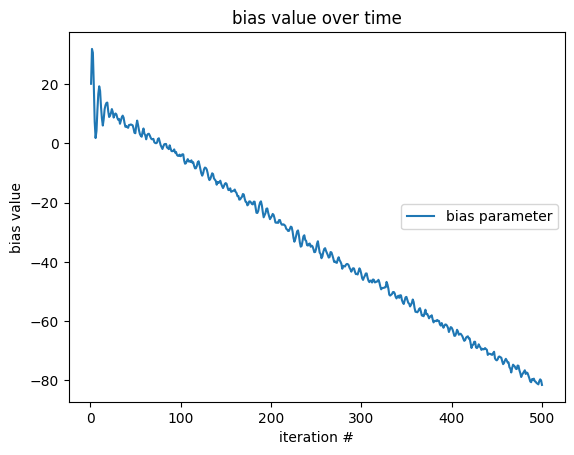

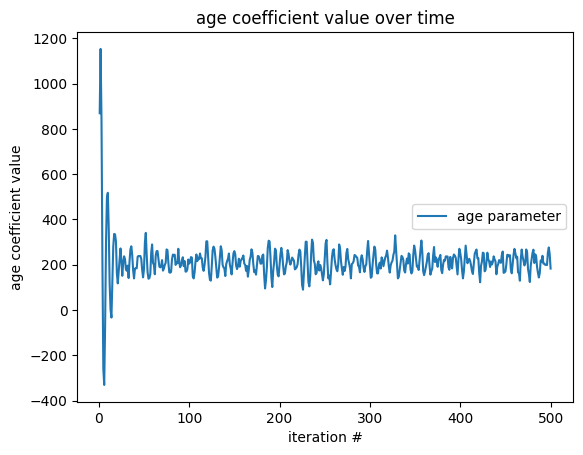

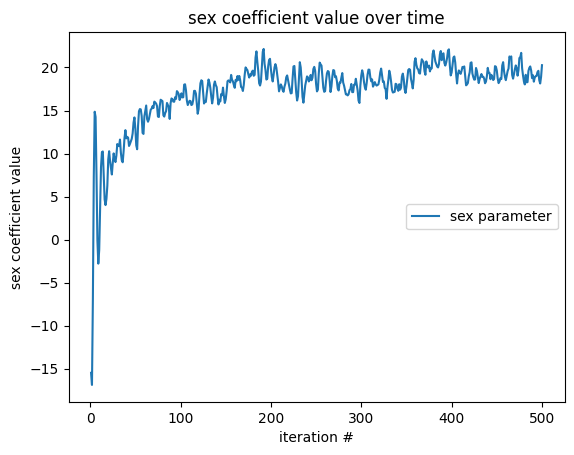

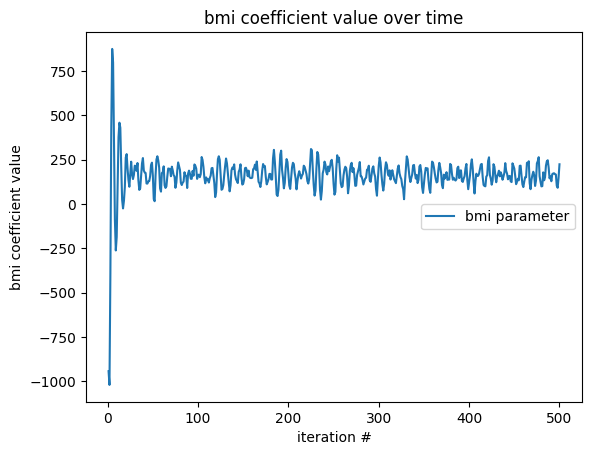

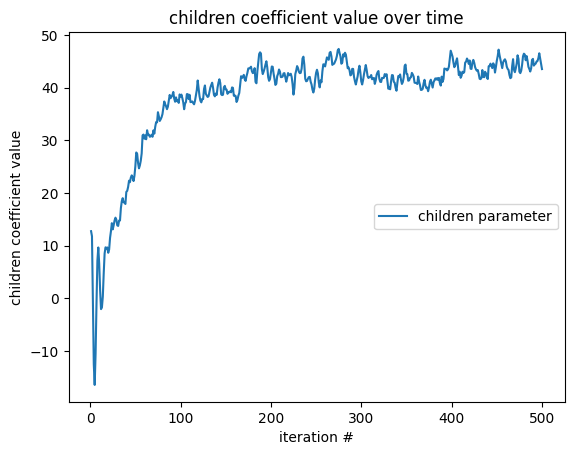

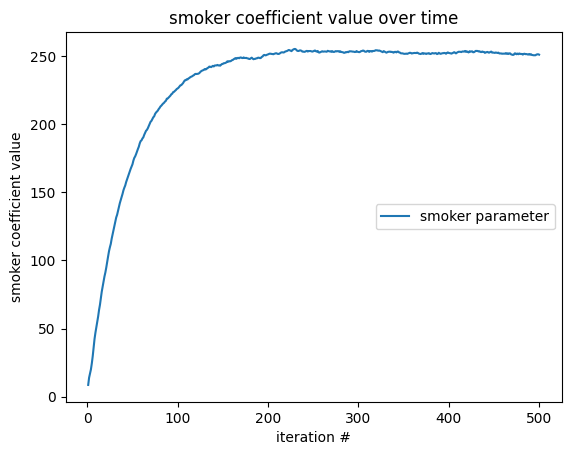

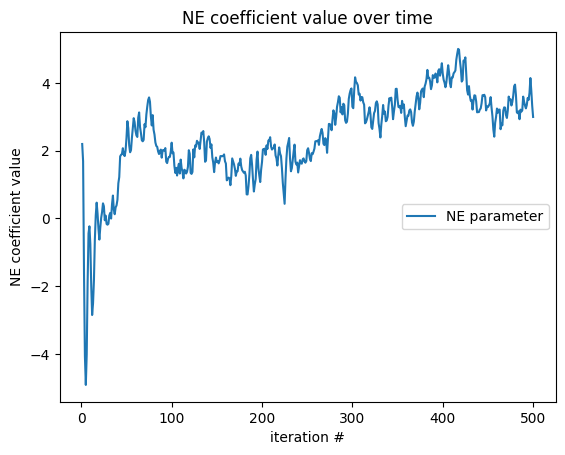

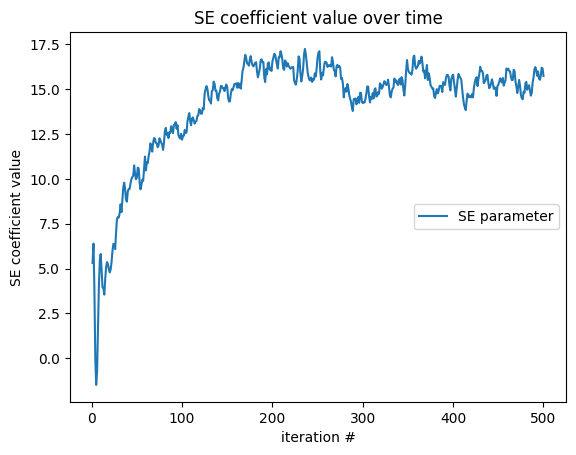

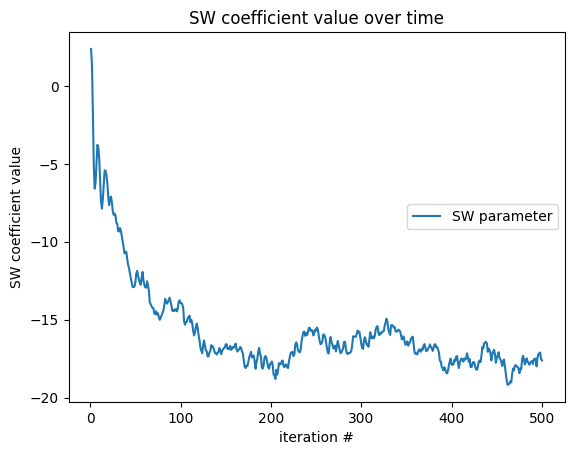

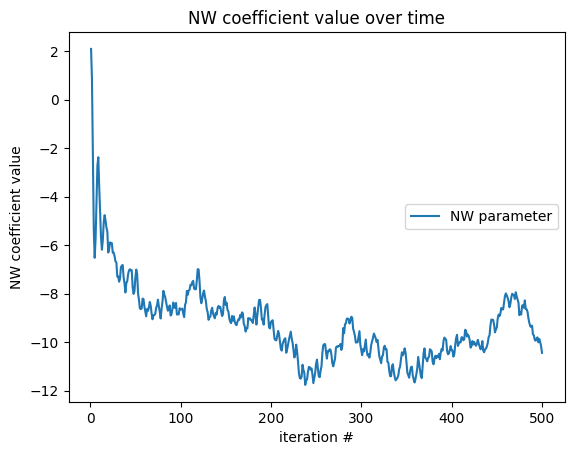

In [ ]:
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'NE', 'SE', 'SW', 'NW']
iteration_list = [i + 1 for i in range(num_iterations)]

# plotting y-intercept over time
plt.plot(iteration_list, [param_hist[i][0] for i in range(num_iterations)], label='bias parameter')
plt.xlabel('iteration #')
plt.ylabel('bias value')
plt.title('bias value over time')
plt.legend(loc='right')

plt.show()

# plotting values of coefficients over time
for i in range(len(columns)):
    plt.plot(iteration_list, [param_hist[j][i + 1] for j in range(num_iterations)], label=f'{columns[i]} parameter')
    plt.xlabel('iteration #')
    plt.ylabel(f'{columns[i]} coefficient value')
    plt.title(f'{columns[i]} coefficient value over time')
    plt.legend(loc='right')

    plt.show()

# Model Evaluation

In [125]:
# functions we'll need

"""
param_list: 1D list of coefficients for linear regression model
input_list: 1D list of inputs that represent a single data point

return prediction value (y-hat)
"""
def prediction(param_list, input_list):
    result = param_list[0] #  the bias

    for i in range(len(input_list)):
        result += param_list[i + 1] * input_list[i] # coefficient * input

    return result

"""
param_list: 1D list of coefficients for linear regression model
input_lists: 2D list of inputs that represent ALL data point inputs
output_lists: 1D list of outcomes (dependent output)
"""
def MSE(param_list, input_lists, output_list):
    result = 0 # mean squared error value
    n = len(output_list) # number of entries in data set

    for i in range(n):
        result += (output_list[i] - prediction(param_list, input_lists[i]))**2 # (y - y-hat)^2

    return result / n # returning mean of sum squared residuals

In [131]:
# plotting example predictions
for i in range(5):
    print(f'{df_x[i]} ==> ${round(prediction(param_hist[-1], df_x[i]), 2)} [actual ${round(df_y[i], 2)}]')

print(min([round(prediction(param_hist[-1], df_x[i]), 2) for i in range(len(df_x))]))
print(max([round(prediction(param_hist[-1], df_x[i]), 2) for i in range(len(df_x))]))

[19, 0, 27.9, 0, 1, 0, 0, 1, 0] ==> $9888.07 [actual $16884.92]
[18, 1, 33.77, 1, 0, 0, 1, 0, 0] ==> $10867.22 [actual $1725.55]
[28, 1, 33.0, 3, 0, 0, 1, 0, 0] ==> $12613.5 [actual $4449.46]
[33, 1, 22.705, 0, 0, 0, 0, 0, 1] ==> $11064.3 [actual $21984.47]
[32, 1, 28.88, 0, 0, 0, 0, 0, 1] ==> $12265.67 [actual $3866.86]
6817.58
21579.47


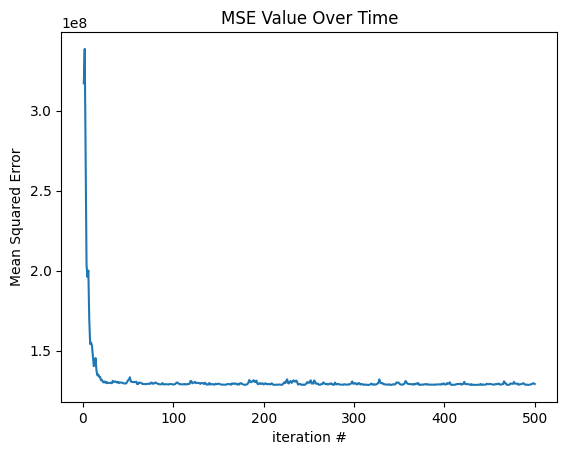

In [127]:
MSE_hist = [MSE(param_hist[i], df_x, df_y) for i in range(num_iterations)]

plt.plot([i + 1 for i in range(num_iterations)], MSE_hist)
plt.xlabel('iteration #')
plt.ylabel('Mean Squared Error')
plt.title('MSE Value Over Time')

plt.show()

# Key Insights

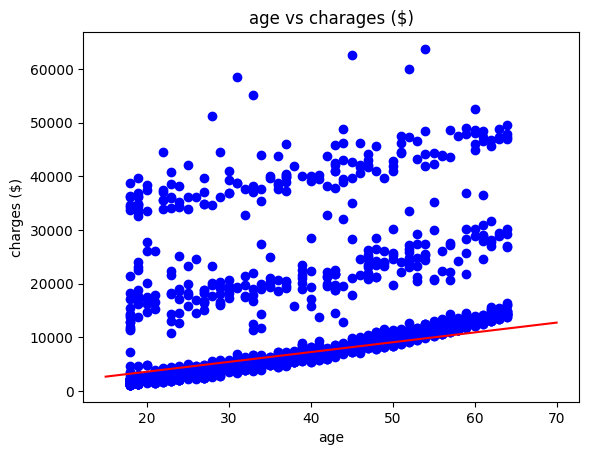

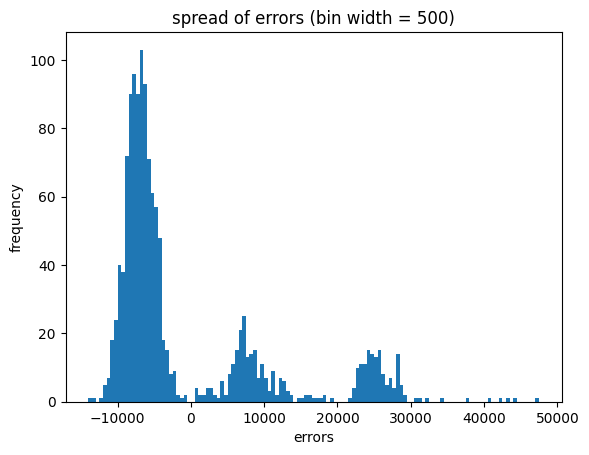

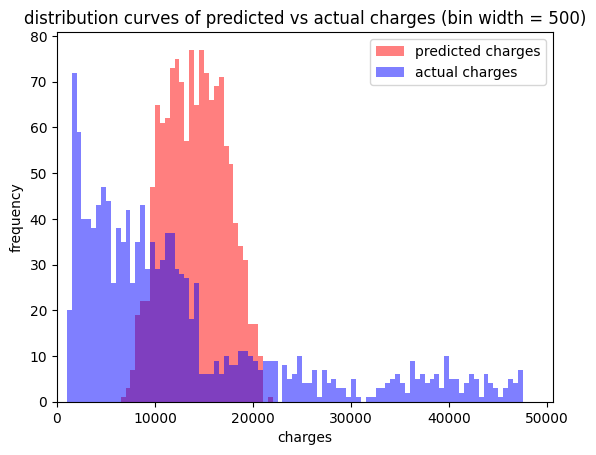

In [134]:
# plotting relationship between age & charges with line of best fit

x_list = [x/100 for x in range(1500, 7000)]
age_predict = [curr_param[0] + (x * curr_param[1]) for x in x_list] # y-hat using only age as the predictor

plt.scatter([df_x[i][0] for i in range(len(df_x))], [df_y[i] for i in range(len(df_y))], color='blue')
plt.plot(x_list, age_predict, color='red', label='age regression')
plt.xlabel('age')
plt.ylabel('charges ($)')
plt.title('age vs charages ($)')

plt.show()




# plotting histogram of errors

errors = [df_y[i] - prediction(param_hist[-1], df_x[i]) for i in range(len(df))]

bin_width = 500
bins_arange = np.arange(min(errors), max(errors) + bin_width, bin_width)

plt.hist(errors, bins=bins_arange)
plt.xlabel('errors')
plt.ylabel('frequency')
plt.title('spread of errors (bin width = 500)')
plt.show()




# plotting histogram of predictions & actual charges
predictions = [prediction(param_hist[-1], df_x[i]) for i in range(len(df_x))]

plt.hist(predictions, bins=bins_arange, alpha=0.5, label='predicted charges', color='red')
plt.hist(df_y, bins=bins_arange, alpha=0.5, label='actual charges', color='blue')
plt.xlim(left=0)
plt.xlabel('charges')
plt.ylabel('frequency')
plt.title('distribution curves of predicted vs actual charges (bin width = 500)')
plt.legend(loc='upper right')
plt.show()

Notes
* dataset contains 3 hidden classes that weren't accounted for in the model
    * the scatter plot for age vs charges ($) shows 3 seemingly parallel linear clusters
    * the histogram for spread of errors shows 3 modes (or hills)
* all parameters except the bias converged relatively quickly
    * bias term appears to continuously decrease with a slight concave-up shape
* histogram for predicted and actual charges shows clear discrepancies
    * shape of predicted charges appear normally distributed
    * shape of actual charges are more skewed right
    * shape of actual charges could be explained by the 3 hidden classes mentioned earlier

## Moving Forward
* could potential layer a classification model to find hidden classes and add features into model
* one promising approach is Gaussian Mixture Model (GMM)
    * GMM assigns probabilities of membership for each class
* since we suspect 3 hidden classes, we'll add 3 additional inputs to linear regression model